# 💡 Perbandingan Model Machine Learning: Bagging vs Boosting

## 📁 Dataset: Heart Disease
- Dataset ini berisi informasi medis seperti usia, jenis kelamin, tekanan darah, kolesterol, dan lain-lain.
- Target asli: `num` (0–4) diubah menjadi biner:
  - `0`: Tidak memiliki penyakit jantung
  - `1`: Memiliki penyakit jantung

## ⚙️ Langkah Preprocessing
- Menghapus data yang hilang (missing values).
- Melakukan normalisasi fitur dengan `StandardScaler`.
- Membagi data menjadi **training (80%)** dan **testing (20%)**.

## 🤖 Model Machine Learning
| Metode    | Algoritma                  | Penjelasan                                                                 |
|-----------|----------------------------|----------------------------------------------------------------------------|
| **Bagging**  | Random Forest Classifier    | Menggabungkan banyak decision tree dengan sampling acak.                 |
| **Boosting** | Gradient Boosting Classifier | Membangun model secara bertahap, memperbaiki kesalahan sebelumnya.       |

## 📊 Metode Evaluasi

### 1. Accuracy

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

> Mengukur seberapa banyak prediksi yang benar dari semua data.

---

### 2. Precision

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

> Dari seluruh prediksi positif, berapa banyak yang benar.

---

### 3. Recall (Sensitivity)

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

> Dari seluruh kasus positif sebenarnya, berapa banyak yang berhasil ditangkap model.

---

### 4. F1 Score

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

> Kombinasi harmonik antara Precision dan Recall, berguna saat data tidak seimbang.

---

### 5. AUC (Area Under Curve)

$$
\text{AUC} = \int_{0}^{1} TPR(FPR) \, dFPR
$$

> Mengukur area di bawah kurva ROC. Semakin mendekati 1 berarti semakin baik.


## 📈 ROC Curve
- Kurva ROC memvisualisasikan hubungan antara **True Positive Rate** dan **False Positive Rate**.
- Semakin besar **AUC**, semakin baik model dalam membedakan kelas positif dan negatif.

## 🔲 Confusion Matrix
- Matriks 2x2 untuk melihat prediksi benar/salah.
- Baris: label asli, Kolom: label prediksi





=== Random Forest (Bagging) ===
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

AUC: 0.9462

=== Gradient Boosting (Boosting) ===
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        36
           1       0.70      0.79      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60

AUC: 0.8854


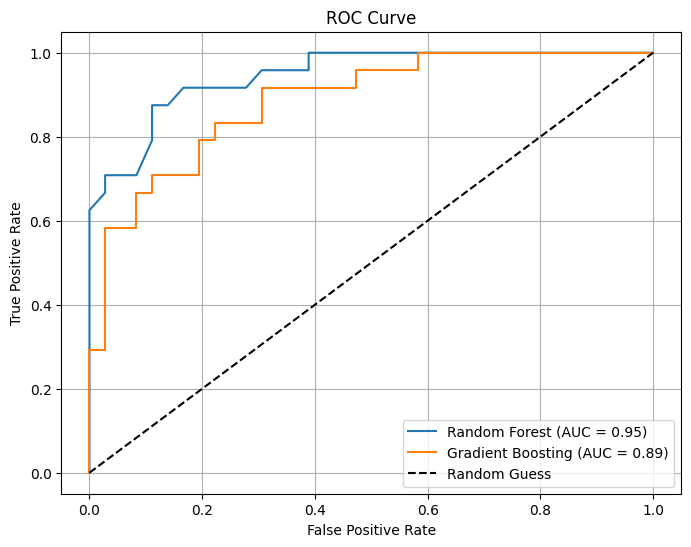

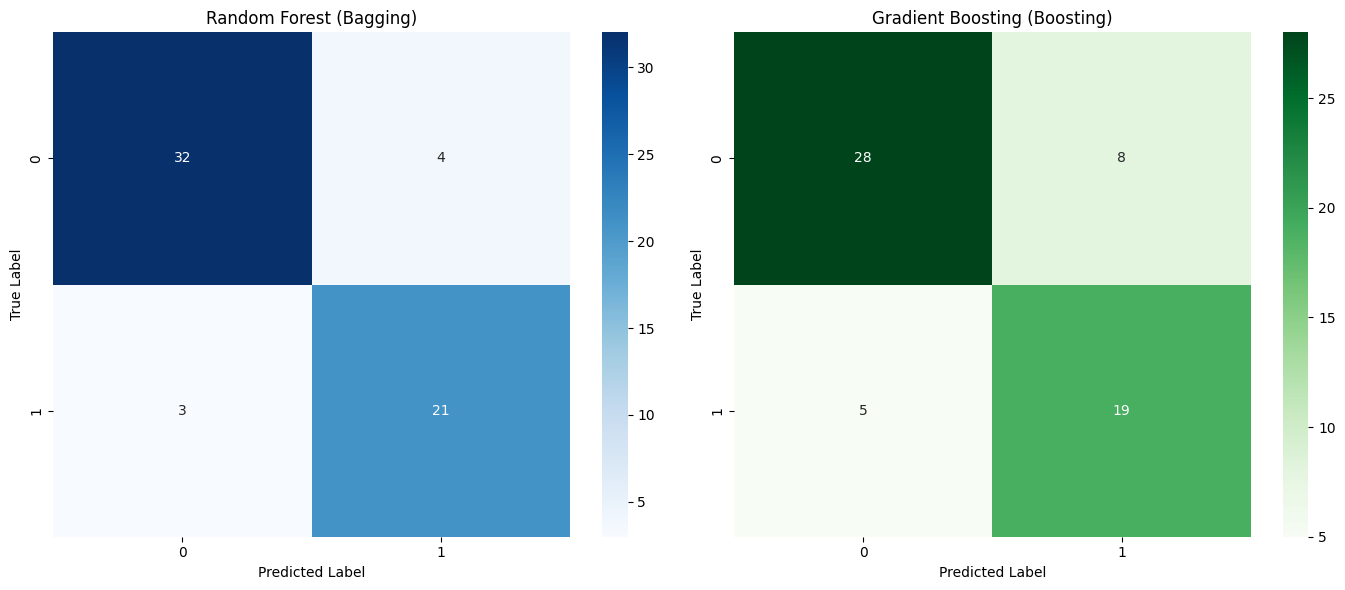

In [1]:
# === 1. Import Library ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

# === 2. Load Dataset ===
df = pd.read_csv("/content/HeartDisease.csv")  # Ganti path jika perlu
df = df.dropna()

# === 3. Binarisasi Target ===
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop(columns='num')

# === 4. Split Fitur dan Target ===
X = df.drop(columns='target')
y = df['target']

# === 5. Split Data Training dan Testing ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 6. Normalisasi Data ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 7. Model Bagging: Random Forest ===
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# === 8. Model Boosting: Gradient Boosting ===
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# === 9. Evaluasi Model ===
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n=== {name} ===")
    print(classification_report(y_true, y_pred))
    auc = roc_auc_score(y_true, y_prob)
    print(f"AUC: {auc:.4f}")
    return auc

rf_auc = evaluate_model("Random Forest (Bagging)", y_test, rf_pred, rf_proba)
gb_auc = evaluate_model("Gradient Boosting (Boosting)", y_test, gb_pred, gb_proba)

# === 10. ROC Curve ===
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_proba)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# === 11. Confusion Matrix ===
rf_cm = confusion_matrix(y_test, rf_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Random Forest (Bagging)")
axs[0].set_xlabel("Predicted Label")
axs[0].set_ylabel("True Label")

sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("Gradient Boosting (Boosting)")
axs[1].set_xlabel("Predicted Label")
axs[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()
